In [1]:
import matplotlib
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
import numpy as np
plots.style.use('fivethirtyeight')

# Standard Normal Distribution

"Standard" refers to the fact that the distribution has mean equal to 0 and standard deviation equal to 1.

"Normal" refers to the fact that the distribution is bell-shaped (unimodal) and symmetric.

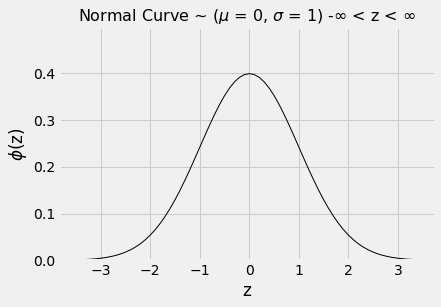

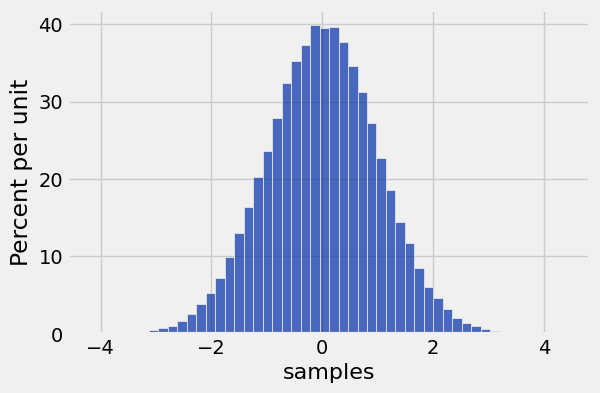

In [ ]:
# Random sample of 100,000 values drawn from the standard normal distribution
samples_array = np.random.standard_normal(size=100000)
Table().with_column('samples', samples_array).hist(bins=50)

In [10]:
print(len(samples_array))
samples_array

100000


array([ 1.20905867,  0.26948923, -1.50072232, ..., -0.14043486,
        0.82445957, -0.44467823])

### What percent of data lies between -1 and 1 on this curve?


In [11]:

# Step 1: Use np.count_nonzero to find the number of values less than -1.
less_than_neg1 = np.count_nonzero(samples_array <= -1)
print(less_than_neg1)
# Step 2: Use np.count_nonzero to find the number of values greater than 1.
greater_than_1 = np.count_nonzero(samples_array >= 1)
print(greater_than_1)
# Step 3: Subtract from the total.
neg1_and_pos1 = len(samples_array)-(less_than_neg1 + greater_than_1)
print(neg1_and_pos1)
# Step 4: Convert to a percent.
neg1_and_pos1_percent = neg1_and_pos1/len(samples_array)*100
print(neg1_and_pos1_percent)


15862
15739
68399
68.399


### What percent of data lies between -2 and 2 on this curve?


In [15]:

# Step 1: Use np.count_nonzero to find the number of values less than -2.
less_than_neg2 = np.count_nonzero(samples_array <= -2)
print(less_than_neg2)
# Step 2: Use np.count_nonzero to find the number of values greater than 2.
greater_than_2 = np.count_nonzero(samples_array >= 2)
print(greater_than_2)
# Step 3: Subtract from the total.
neg2_and_pos2 = len(samples_array)-(less_than_neg2 + greater_than_2)
print(neg2_and_pos2)
# Step 4: Convert to a percent.
neg2_and_pos2_percent = neg2_and_pos2/len(samples_array)*100
print(neg2_and_pos2_percent)

2357
2284
95359
95.359


### What percent of data lies between -3 and 3 on this curve?

In [16]:

# Step 1: Use np.count_nonzero to find the number of values less than -3.
less_than_neg3 = np.count_nonzero(samples_array <= -3)
print(less_than_neg3)
# Step 2: Use np.count_nonzero to find the number of values greater than 3.
greater_than_3 = np.count_nonzero(samples_array >= 3)
print(greater_than_3)
# Step 3: Subtract from the total.
neg3_and_pos3 = len(samples_array)-(less_than_neg3 + greater_than_3)
print(neg3_and_pos3)
# Step 4: Convert to a percent.
neg3_and_pos3_percent = neg3_and_pos3/len(samples_array)*100
print(neg3_and_pos3_percent)

127
125
99748
99.748


## Bell-Shaped, Symmetric, Nonstandard Distribution

In [17]:
births = Table.read_table('baby.csv')
births

Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
120,284,27,62,100,False
113,282,33,64,135,False
128,279,28,64,115,True
108,282,23,67,125,True
136,286,25,62,93,False
138,244,33,62,178,False
132,245,23,65,140,False
120,289,25,62,125,False
143,299,30,66,136,True
140,351,27,68,120,False


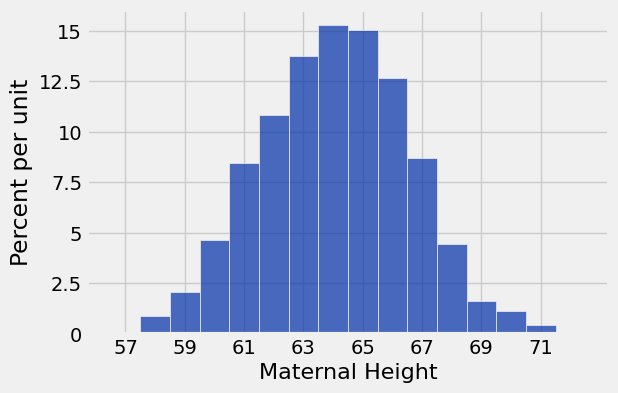

In [18]:

births.hist('Maternal Height', bins = np.arange(56.5, 72.6, 1))
plots.xticks(np.arange(57, 72, 2));

### What percent of the data is at most one standard deviation from the mean?

In [19]:
# Computing the mean and standard deviation
heights = births.column('Maternal Height')
print(np.mean(heights))
print(np.std(heights))

64.0494037479
2.52502544097


In [26]:
# Modify the example from the standard normal
standardized_heights_left = (np.mean(heights)) -  (np.std(heights))
print(standardized_heights_left)
standardized_heights_right = (np.mean(heights)) +  (np.std(heights))
print(standardized_heights_right)
within_one_std = np.count_nonzero((heights >= standardized_heights_left) & (heights <= standardized_heights_right))
print(within_one_std)
within_one_std_percent = within_one_std/len(heights)*100
print(within_one_std_percent)

61.5243783069
66.5744291888
791
67.3764906303


### What percent of the data is at most two standard deviations from the mean?

In [27]:
standardized_heights_left = (np.mean(heights)) -  (np.std(heights)*2)
print(standardized_heights_left)
standardized_heights_right = (np.mean(heights)) +  (np.std(heights)*2)
print(standardized_heights_right)
within_one_std = np.count_nonzero((heights >= standardized_heights_left) & (heights <= standardized_heights_right))
print(within_one_std)
within_one_std_percent = within_one_std/len(heights)*100
print(within_one_std_percent)

58.9993528659
69.0994546298
1141
97.1890971039


### What percent of the data is at most three standard deviations from the mean?

In [28]:
standardized_heights_left = (np.mean(heights)) -  (np.std(heights)*3)
print(standardized_heights_left)
standardized_heights_right = (np.mean(heights)) +  (np.std(heights)*3)
print(standardized_heights_right)
within_one_std = np.count_nonzero((heights >= standardized_heights_left) & (heights <= standardized_heights_right))
print(within_one_std)
within_one_std_percent = within_one_std/len(heights)*100
print(within_one_std_percent)

56.474327425
71.6244800708
1170
99.6592844974


Write a function called bounded_by_sd. It takes two inputs: data_arr and num_sd. The function should return the percent of the data in data_arr that is at most num_sd standard deviations from the mean.

In [32]:
def standardize(data_arr, num_std):
   
    mean = np.mean(data_arr)
    std = np.std(data_arr)

    mean_minus_std = mean - (std * num_std)
    mean_plus_std = mean + (std * num_std)

    # Step 1: Use np.count_nonzero to find the number of values less than mean_minus_std.
    num_left_tail  = np.count_nonzero(data_arr <= mean_minus_std)
    print(num_left_tail)

    # Step 2: Use np.count_nonzero to find the number of values greater than mean_plus_sd.
    num_right_tail = np.count_nonzero(data_arr >= mean_plus_std)
    print(num_right_tail)

    # Step 3: Subtract from the total.
    num_center = len(data_arr)-(num_left_tail + num_right_tail)
    print(num_center)

    # Step 4: Convert to a percent.
    percent_center = num_center/len(data_arr)*100
    print(percent_center)
    
    return percent_center

In [37]:
# Test the function on the heights array.

## Summary of "The Empirical Rule"

For bell-shaped and symmetric distributions:

mean ± 1 SD captures about 68% of the data

mean ± 2 SDs captures about 95% of the data

mean ± 3 SDs captures about 99.73% of the data